In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/datasets

/content/gdrive/My Drive/datasets


In [4]:
df = pd.read_csv('vehicle_emissions.csv')

In [64]:
df

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,8.5,196
1,2.4,4,Z,9.6,221
2,1.5,4,Z,5.9,136
3,3.5,6,Z,11.1,255
4,3.5,6,Z,10.6,244
...,...,...,...,...,...
7380,2.0,4,Z,9.4,219
7381,2.0,4,Z,9.9,232
7382,2.0,4,Z,10.3,240
7383,2.0,4,Z,9.9,232


In [7]:
df1=df.copy()

In [8]:
df.shape

(7385, 12)

In [13]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [9]:
df.isnull().values.any()

False

### DUPLICATED DATA

In [5]:
df_duplicated=df[df.duplicated() == True]
df_duplicated

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [11]:
sum(df_duplicated.groupby(by =['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type'])['Fuel Consumption City (L/100 km)'].nunique())

979

You can remove the duplicated values if u want to

In [6]:
df["Gears"]= df['Transmission'].str[-1]

df['Transmission']=df['Transmission'].str[0:-1]
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,6


DATA PREPROCESSING

In [7]:
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Gears','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [8]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,8.5,196
1,2.4,4,Z,9.6,221
2,1.5,4,Z,5.9,136
3,3.5,6,Z,11.1,255
4,3.5,6,Z,10.6,244


In [9]:
df_N=df[df["Fuel Type"]=="N"]
indexs=df_N.index
df_N

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
2439,3.6,6,N,12.7,213


In [10]:
# Kick Fuel Type N
for i in indexs:
    df.drop(i, axis = 0,inplace = True)

In [11]:
df[df["Fuel Type"]=="N"]

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)


Fuel type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas (none)

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['FType'] = le.fit_transform(df['Fuel Type'])


In [72]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),FType
0,2.0,4,Z,8.5,196,3
1,2.4,4,Z,9.6,221,3
2,1.5,4,Z,5.9,136,3
3,3.5,6,Z,11.1,255,3
4,3.5,6,Z,10.6,244,3


In [12]:
dums = pd.get_dummies(df['Fuel Type'],prefix="Fuel_Type",drop_first=True)
dums[0:5]

,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
frames = [df, dums]
result = pd.concat(frames,axis=1)
result

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,Z,8.5,196,0,0,1
1,2.4,4,Z,9.6,221,0,0,1
2,1.5,4,Z,5.9,136,0,0,1
3,3.5,6,Z,11.1,255,0,0,1
4,3.5,6,Z,10.6,244,0,0,1
...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,9.4,219,0,0,1
7381,2.0,4,Z,9.9,232,0,0,1
7382,2.0,4,Z,10.3,240,0,0,1
7383,2.0,4,Z,9.9,232,0,0,1


In [14]:
result.drop(['Fuel Type'],inplace=True,axis=1)
result.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,196,0,0,1
1,2.4,4,9.6,221,0,0,1
2,1.5,4,5.9,136,0,0,1
3,3.5,6,11.1,255,0,0,1
4,3.5,6,10.6,244,0,0,1


In [15]:
df_out=result.copy()

In [73]:
X = df.drop(['CO2 Emissions(g/km)','Fuel Type'], axis= 1)
y = result["CO2 Emissions(g/km)"]

In [74]:
X["Engine Size(L)"]=X["Engine Size(L)"].map(lambda x:round(x,2))
X["Cylinders"]=X["Cylinders"].map(lambda x:round(x,2))
X["Fuel Consumption Comb (L/100 km)"]=X["Fuel Consumption Comb (L/100 km)"].map(lambda x:round(x,2))
X

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),FType
0,2.0,4,8.5,3
1,2.4,4,9.6,3
2,1.5,4,5.9,3
3,3.5,6,11.1,3
4,3.5,6,10.6,3
...,...,...,...,...
7380,2.0,4,9.4,3
7381,2.0,4,9.9,3
7382,2.0,4,10.3,3
7383,2.0,4,9.9,3


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [76]:
X_train.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),FType
1620,3.7,6,10.3,3
2945,2.0,4,8.5,2
3735,2.5,4,10.2,2
7024,1.3,4,9.9,2
1801,4.7,8,15.2,3


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
X_train

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),FType
1620,3.7,6,10.3,3
2945,2.0,4,8.5,2
3735,2.5,4,10.2,2
7024,1.3,4,9.9,2
1801,4.7,8,15.2,3
...,...,...,...,...
5192,2.0,4,8.4,3
5227,5.6,8,15.4,2
5391,3.5,6,8.3,2
860,2.5,4,8.6,2


In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 1620 to 7271
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    5538 non-null   float64
 1   Cylinders                         5538 non-null   int64  
 2   Fuel Consumption Comb (L/100 km)  5538 non-null   float64
 3   FType                             5538 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 216.3 KB


In [25]:
y_train

1620    237
2945    199
3735    239
7024    230
1801    350
       ... 
5192    197
5227    362
5391    193
860     198
7271    243
Name: CO2 Emissions(g/km), Length: 5538, dtype: int64

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_test

5632    368
1550    290
1128    382
6498    211
3270    193
       ... 
7220    261
6227    184
5846    261
3998    230
6746    258
Name: CO2 Emissions(g/km), Length: 1846, dtype: int64

In [30]:
y2=y_test.values
y2.reshape(-1, 1)

array([[368],
       [290],
       [382],
       ...,
       [261],
       [230],
       [258]])

In [85]:
print(f'{model.score(X_train, y_train)*100}%')

89.17986527443036%


In [86]:
print(model.score(X_test, y_test))

0.8860618581399387


In [99]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']

In [100]:
clf = load('model.joblib')
clf.predict(ip)

array([529.00233795])

In [101]:
#Engine Size(L),	Cylinders, Fuel Consumption Comb (L/100 km), Fuel_Type_E,	Fuel_Type_X,	Fuel_Type_Z

engine = 2.3
cyl = 4
cons = 23.3
fuel_x = 0.0
fuel_y = 1.0
fuel_z = 0.0


ip = np.array([[2.3, 4, 23.3, 0.0, 1.0, 0.0]])  

ip1 = pd.DataFrame(ip, columns=['Engine Size(L)',	'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel_Type_E',	'Fuel_Type_X',	'Fuel_Type_Z'])  


In [102]:
model.predict(ip) 

array([529.00233795])

In [52]:
X_new = result.drop(['CO2 Emissions(g/km)'], axis= 1)
y_new = result["CO2 Emissions(g/km)"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                    y_new, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [92]:
model.fit(X_train.values, y_train)

LinearRegression()

In [94]:
model.predict(X_test.values)

array([361.10629495, 292.10356586, 383.06438767, ..., 256.99875035,
       227.88743706, 256.42196998])

In [95]:
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9918164282292635

In [97]:
model.predict(ip1) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([529.00233795])

In [96]:
import pickle
filename = "emissions2.pkl"
pickle.dump(model, open(filename, 'wb')) 


DATA VISUALISATION

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'CO2 Emissions(g/km)')

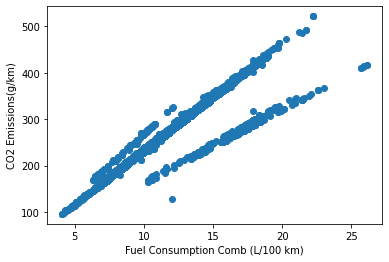

In [65]:
plt.scatter(X_train['Fuel Consumption Comb (L/100 km)'], y_train) 
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')

Text(0, 0.5, 'CO2 Emissions(g/km)')

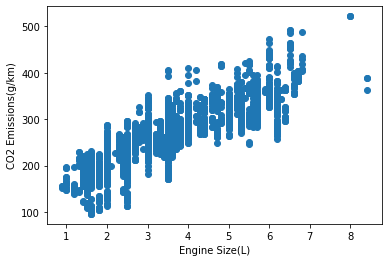

In [67]:
plt.scatter(X_train['Engine Size(L)'], y_train)
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)') 

Text(0, 0.5, 'CO2 Emissions(g/km)')

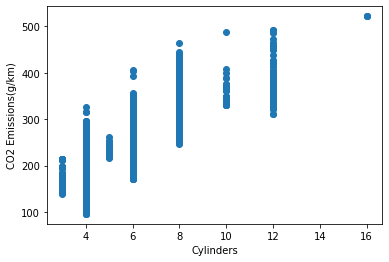

In [68]:
plt.scatter(X_train['Cylinders'], y_train)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions(g/km)')